# Naive Bayes: Three Examples

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB  
# Multinomial (more than 2 classes. extension of binomial)
# GaussianNB (continuous features)
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian Example: (Meaning data is continuous)
Let's work on using height and weigth to predict gender. It's a common example problem for the use of Bayes as a classifier. The data is from the repo for the book Machine Learning for Hackers.

In [2]:
data = pd.read_csv('data/height_weight_gender.csv')

In [3]:
data['Gender'] = (data['Gender'] != 'Male').astype(int)

In [15]:
data.head()

Gender     Height      Weight
0       0  73.847017  241.893563
1       0  68.781904  162.310473
2       0  74.110105  212.740856
3       0  71.730978  220.042470
4       0  69.881796  206.349801

In [4]:
# Always do a value_counts on your target variable to check if it's a biased dataset
data.Gender.value_counts()  # Balanced dataset. Half female half male

1    5000
0    5000
Name: Gender, dtype: int64

In [5]:
def scatter_plot_data(data):
    plt.figure(dpi=150)
    for ix, label in enumerate(['Male','Female']):
        new_data = data[data['Gender']==ix]
        plt.scatter(new_data['Height'], new_data['Weight'],c=plt.cm.jet(ix/0.5), alpha=0.4, label=label, s=5)
    plt.ylabel("Weight")
    plt.xlabel("Height")
    plt.legend(loc="upper left");

scatter_plot_data(data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [6]:
# Looking at the dataset
# It makes sense to model this as Gaussian because it's not a either 1 or 0 type of data

X = data.iloc[:,1:]
y = data.iloc[:,0]
X.head()

Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801

In [7]:
# We are not doing CV here but we HAVE to do CV in our Project!!
# k-fold: 5
# k-fold: 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train) # Fit GaussianNB object with training data
nb.score(X_test, y_test) # Score it 

# THe 12% that is misclassified is most likely around the area where male and female data points intersect a lot.
# Look at plot above

0.887

0.887 Meaning out of all the males/females, data got 0.887 correct.

In [9]:
nb.theta_ # mean of each feature by class

# This numbers here describe how the data is separated
# 69 and 186 -> Describing the 'hump' with the highest concetration of male ponts
# 63 and 135 -> Describing the 'hump' with the highest concetration of female ponts

array([[ 68.9900513 , 186.76084224],
       [ 63.70633072, 135.85586208]])

In [10]:
np.sqrt(nb.sigma_) # variance of each feature by class

array([[ 2.88690446, 19.90792104],
       [ 2.69939185, 18.94517396]])

In [11]:
# Helper functions to help you visualize your results
# Will also help you plot a boundary
# Plot hyperplane

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 3, x.max() + 3
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


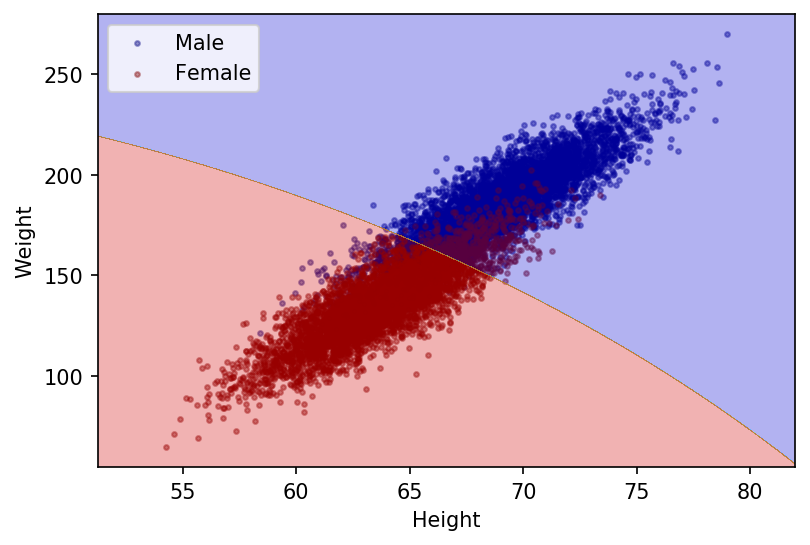

In [12]:
scatter_plot_data(data)
ax = plt.gca()
plot_contours(ax, nb, X.as_matrix(), y.as_matrix(), cmap=plt.cm.jet, alpha=0.3);

In [13]:
# Whatever is below the hyperplane will be considered as female
# Whatever above hyperplane is considered male

## Bernoulli Example: Now let's try votes!

In [14]:
def generate_congress_data(num_congressmen=100):
    votes = [0,1]
    senators = np.random.choice(votes, replace=True, size=(num_congressmen,4))
    df = pd.DataFrame(senators, columns=['vote1','vote2','vote3','vote4'])
    
    def calculate_party(row):
        x = row['vote1']
        y = row['vote2']
        z = row['vote3']

        party = 0.7*x + 0.5*y - z + np.random.normal(0,0.3)
        if party > 0.1:
            return 'Dem'
        elif party > 0.01:
            return 'Ind'
        else:
            return 'Rep'
    
    df['party'] = df.apply(calculate_party,axis=1)
    print(df.party.value_counts())
    return df.iloc[:,:-1],df.iloc[:,-1]

X, y = generate_congress_data(num_congressmen=400)

Dem    195
Rep    188
Ind     17
Name: party, dtype: int64


In [16]:
X.head()

vote1  vote2  vote3  vote4
0      0      1      0      1
1      1      0      1      0
2      0      1      1      0
3      0      0      0      0
4      1      0      1      0

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8

In [19]:
dc = DummyClassifier() # not for real problems, just a baseline 
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.3416666666666667

## Multinomial example: Predicting what a document is about

In [40]:
from sklearn import datasets

categories = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
ng_train = datasets.fetch_20newsgroups(subset='train', 
                                       categories=categories, 
                                       remove=('headers', 
                                               'footers', 'quotes'))

In [41]:
ng_train.data

['\n\n\nI happen to be a big fan of Jayson Stark.  He is a baseball writer for the \nPhiladelphia Inquirer.  Every tuesday he writes a "Week in Review" column.  \nHe writes about unusual situations that occured during the week.  Unusual\nstats.  He has a section called "Kinerisms of the Week" which are stupid\nlines by Mets brodcaster Ralph Kiner.  Every year he has the LGTGAH contest.\nThat stands for "Last guy to get a hit."  He also writes for Baseball \nAmerica.  That column is sort of a highlights of "Week in Review."  If you \ncan, check his column out sometime.  He might make you laugh.\n\nRob Koffler\n',
 '\nHere\'s one I remember: (sort of)\nYogi\'s asleep in a hotel room late at night and gets a call from someone.\nAfter he answers the phone the person at the other end asks if he woke Yogi\nup. Yogi answered, "No, the phone did."',
 '\n\n\tSorry, I was, but I somehow have misplaced my diskette from the last \ncouple of months or so. However, thanks to the efforts of Bobby, it

In [42]:
X_train, X_test, y_train, y_test = train_test_split(ng_train.data, ng_train.target, test_size=0.3, random_state=42)

In [43]:
X_train # sparse matrix is used when your data set has many 0's

["\n\n\tThe defenition of the Underdog is a team that has no talent and comes\nout of nowhere to contend.  The '69 Mets and '89 Orioles are prime examples,\nnot the Cubs.  I root for the Cubs, because I feel sorry for them, but \nbasically they are dogs.  The Pirates today are a great example of an underdog.\nIf the Rockies and Marlins compete, they will be underdogs.  The North Stars\ntrip to the Stanley Cup finals was a good example of an underdog's journey. \nThe Cubs have a good team this year, and play in a weak division, they are much\nless than America's Team.\n\n",
 '[snip]\n[stats deleted - we\'ve all seen them by now]\n\nI nominate this last bit for "Anti-Stathead Quote of the Week".\n\nAlomar only has a 50 point advantage in the most important offensive\ncategory, while Baerga, who studied in the Joe Carter School of Out-Burning,\nhas more impressive mediot stats, largely due to opportunities rather\nthan quality.\n\nThe lines are fairly close in value, but edge to Alomar.\n

In [44]:
from sklearn.feature_extraction.text import CountVectorizer  

# This function CountVectorizer will convert your text into counts
# Eg.
# I love chicken skin
# I hate cabbage
# I: 2
# love: 1
# animals: 1

# Convert a collection of text documents to a matrix of token counts
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)


# This is something you have to do if you want to do text analysis
X_train = count_vectorizer.fit_transform(X_train)  # Convert text into counts
X_test = count_vectorizer.transform(X_test)

In [45]:
nb = MultinomialNB()
nb.fit(X_train, y_train)  # What is the probability that it is food given i observe the world animal
nb.score(X_test, y_test)

# This mutlinomial example is basically counting all the words in an article.
# THen next time, when a new dataset (article) that comes in with the highest occurence of the word "god"
# The model will then classify this article under atheism
# Because in the training dataset, the word "god" comes up a lot in athesim-related articles

# Therefore, this is basically transforming the article into counts of words

0.9458917835671342

In [46]:
new_data = ng_train.data[0]
print(new_data)




I happen to be a big fan of Jayson Stark.  He is a baseball writer for the 
Philadelphia Inquirer.  Every tuesday he writes a "Week in Review" column.  
He writes about unusual situations that occured during the week.  Unusual
stats.  He has a section called "Kinerisms of the Week" which are stupid
lines by Mets brodcaster Ralph Kiner.  Every year he has the LGTGAH contest.
That stands for "Last guy to get a hit."  He also writes for Baseball 
America.  That column is sort of a highlights of "Week in Review."  If you 
can, check his column out sometime.  He might make you laugh.

Rob Koffler



In [47]:
new_X = count_vectorizer.transform([new_data])

In [48]:
nb.predict(new_X)

array([2], dtype=int64)